In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib

In [13]:
import assaytools

In [14]:
from assaytools import platereader

In [15]:
filenames = [
    'p38_Bos_conc0_20180402_152751.xml',
    'p38_Bos_conc1_20180402_171751.xml', 
    'p38_Bos_conc2_20180402_181751.xml', 
    'p38_Bos_conc3_20180402_191757.xml',
    'p38_Bos_conc4_20180402_201804.xml',
    'p38_Bos_conc5_20180402_211811.xml', 
    'p38_Bos_conc6_20180402_221821.xml', 
    'p38_Bos_conc7_20180402_231830.xml',
    'p38_Bos_conc8_20180403_001902.xml', 
    'p38_Bos_conc9_20180403_011911.xml',
    'p38_Bos_conc10_20180403_021916.xml', 
    'p38_Bos_conc11_20180403_031921.xml', 
    'p38_Bos_conc12_20180403_041152.xml', 
    'p38_Bos_conc14_20180403_061204.xml', 
    'p38_Bos_conc15_20180403_071209.xml', 
    'p38_Bos_conc16_20180403_081210.xml'
]
datapath = '20180402_kinase_panel_HT_single_well_binding_data'

In [16]:
concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 3.174e-06, 
         6.037e-06, 10.862e-06, 18.991e-06])


In [17]:
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)

In [18]:
plate_layout = pd.read_excel('20180402_kinase_panel_HT_single_well_binding_data/040218_Kinase_dispensing_for_binding_assay.xlsx', header=None)
plate_layout = plate_layout.loc[:, 0:1]
plate_layout.columns = ['well', 'name']
if len(list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')) > 0: 
    list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')

In [19]:
nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'

title = 'Specta Reads at 280nm'
data = np.zeros([nrows, ncols, nreads, 65], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = [list(reads[i][label][well].values()) for i in range(nreads)] 
        for i in range(nreads):
            measurements[i] = [x if x != 'OVER' else 0 for x in measurements[i]]
        data[row_index,col_index,:] = np.array(measurements)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


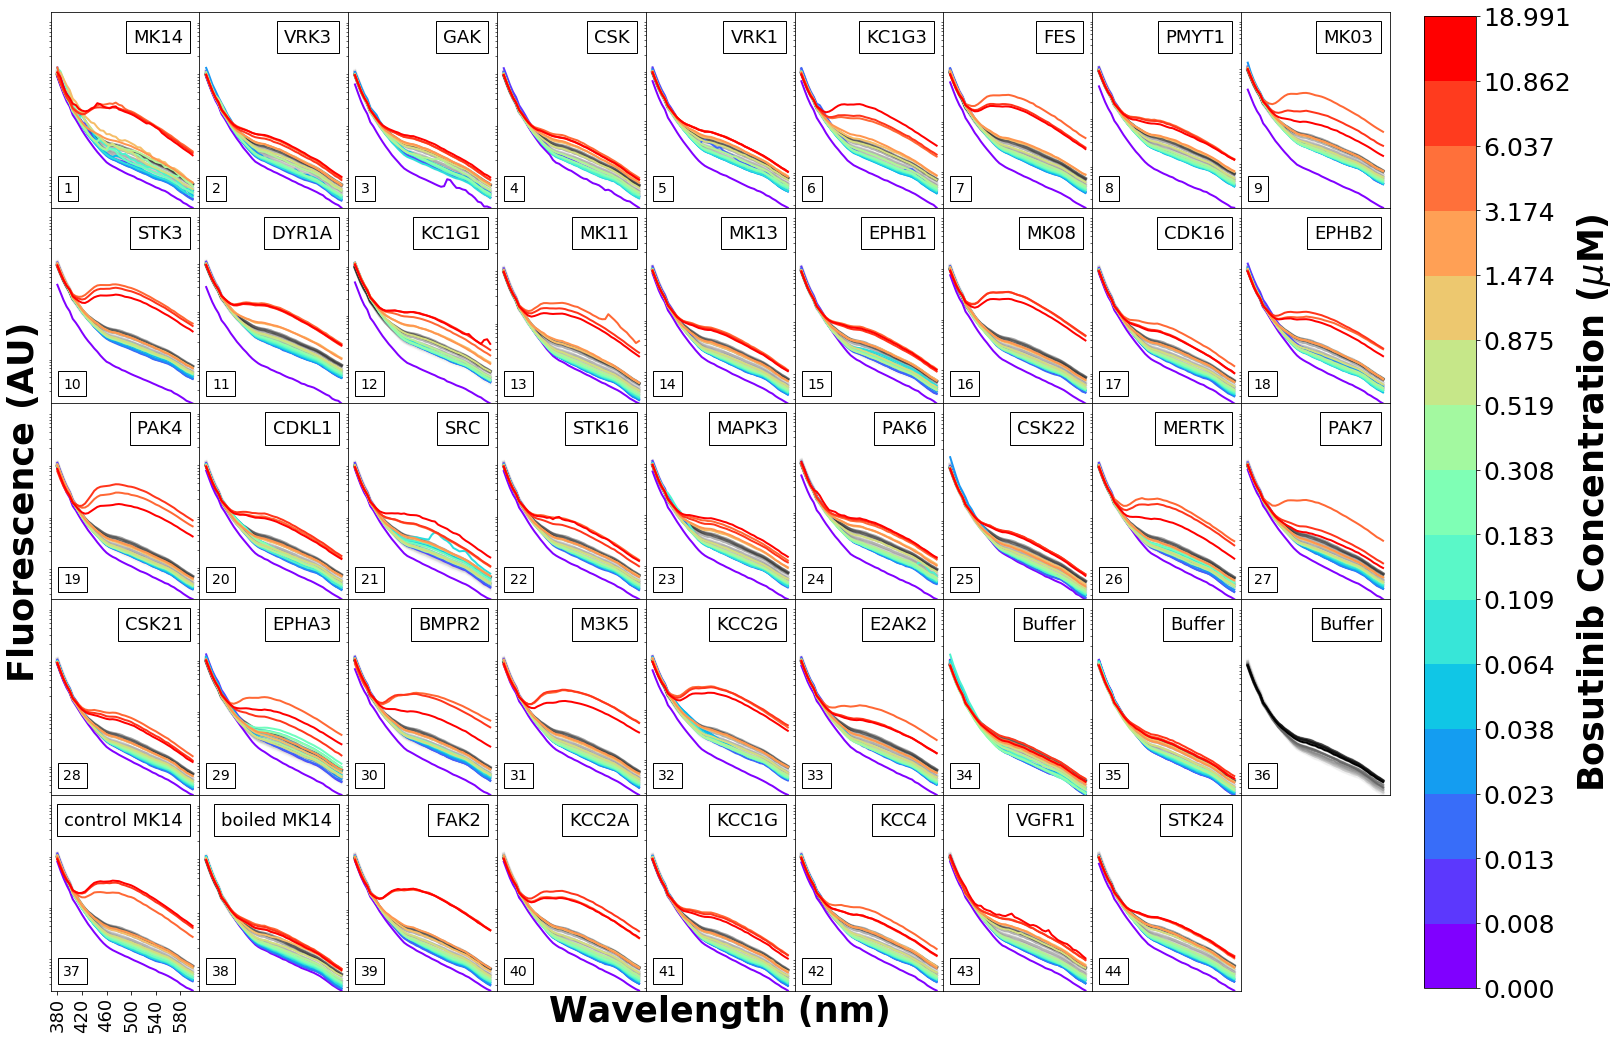

In [25]:
nrows_fig = 5
ncols_fig = 9
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows=nrows_fig, ncols=ncols_fig, figsize=[24,18])

label = 'ex280_scan_top_gain100'
title = 'Specta Reads at 280nm'


        
ymax = data.max().max().max()
xmax = max(list(reads[0][label][well].keys()))
xmin = min(list(reads[0][label][well].keys()))
c = list(concentrations)
           
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0: 
            ax = plt.subplot(nrows_fig,ncols_fig,index+1)
            gray = cm.Greys(np.linspace(0,1,16))
            for read, c in zip(data[4,3,:, 20:], gray):
                plt.semilogy(x_values[20:], read, c=c, alpha=.3, linewidth=3);
            
            if index in [35]: 
                color=cm.Greys(np.linspace(0,1,16))
            else: 
                color=cm.rainbow(np.linspace(0,1,16))
            for read, c in zip(data[row_index,col_index,:, 20:], color):
                plt.semilogy(x_values[20:], read, c=c, linewidth=2);
            
            if index == 36:
                plt.xticks(np.arange(int(x_values[20]), 620, 40),x_values[20::8], rotation=90, fontsize=18)
            else:
                plt.xticks([]);
            plt.yticks([]);
            plt.ylim(0, ymax)
            if len(list(plate_layout[plate_layout.well == well].name)) > 0: 
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            if index == 40: 
                plt.xlabel('Wavelength (nm)', fontsize=35, fontweight='bold')
            if index == 18: 
                plt.ylabel('Fluorescence (AU)', fontsize=35, fontweight='bold')
            
            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
            ax.add_artist(anchored_text2)
            

# Get rid of ticks on the last plot, which isn't being used 

ax = plt.subplot(nrows_fig,ncols_fig,index+1)
fig.delaxes(ax)
fig.subplots_adjust(wspace=0, hspace=0)
cax = fig.add_axes([.92, 0.127, 0.03, 0.75])

micro_concentrations = np.multiply(concentrations, 1e6)
norm = matplotlib.colors.BoundaryNorm(micro_concentrations, cm.rainbow.N)
norm = matplotlib.colors.BoundaryNorm(micro_concentrations, cm.rainbow.N)
conc_labels = ['{0:.3f}'.format(x) for x in micro_concentrations]
cb = matplotlib.colorbar.ColorbarBase(cax, cmap='rainbow', norm=norm, ticks=micro_concentrations, boundaries=micro_concentrations)
cb.set_label('Bosutinib Concentration ($\mu$M)', fontsize=35, fontweight='bold')
cb.ax.tick_params(labelsize=25)
cb.ax.set_yticklabels(conc_labels)

fig.savefig('bos_spectra_45_logy.pdf', bbox_inches='tight', dpi=300)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0.5,1,'Row E')

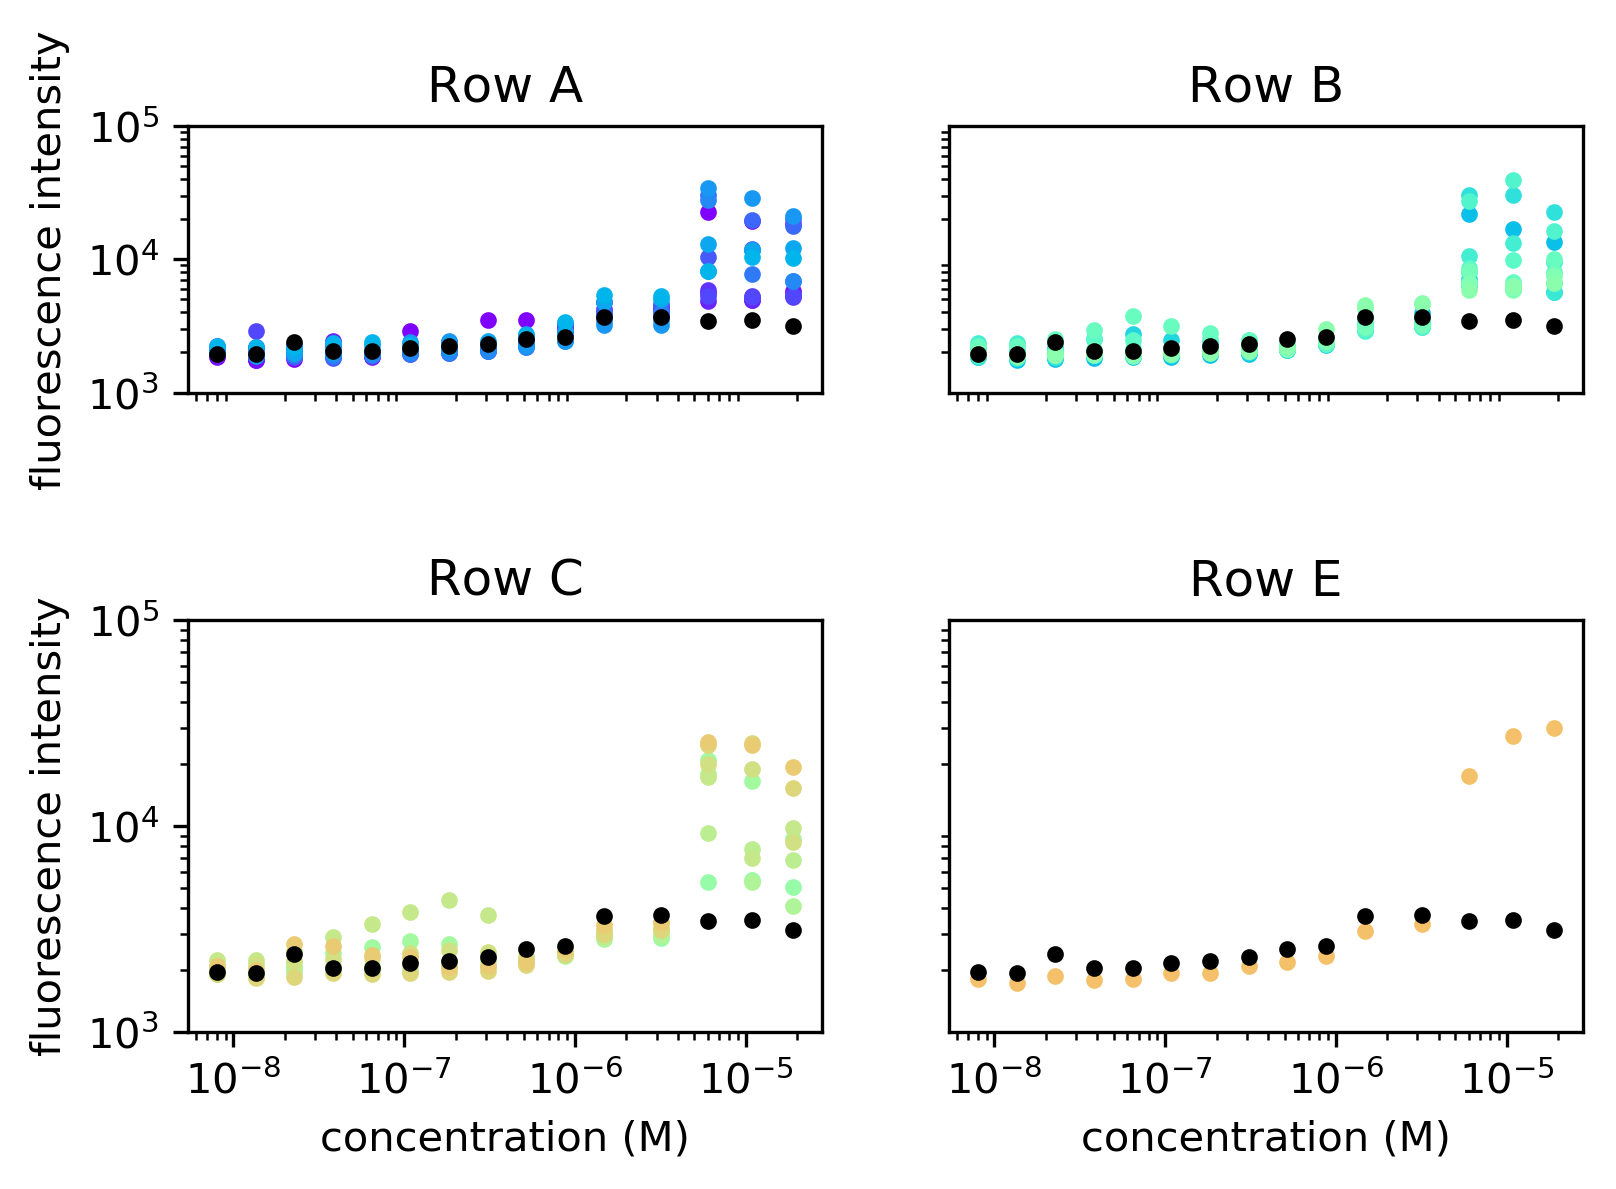

In [158]:
fig = plt.figure(figsize=(6,4), dpi=300)


color=cm.rainbow(np.linspace(0,1,45))
colorindex = 0
wavelength = '480'

ax = fig.add_subplot(3,2,1)
for row in [0]:
    for column in range(ncols):
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.xticks([])
plt.ylabel('fluorescence intensity');
plt.title('Row A')

ax = fig.add_subplot(3,2,2)
for row in [1]:
    for column in range(ncols):
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.yticks([])
plt.xticks([])
plt.title('Row B')

ax = fig.add_subplot(2,2,3)
for row in [2]:
    for column in range(ncols)[0:8]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.xlabel('concentration (M)');
plt.ylabel('fluorescence intensity');
plt.title('Row C')

ax = fig.add_subplot(2,2,4)
for row in [4]:
    for column in [4]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.xlabel('concentration (M)');
plt.yticks([])
plt.title('Row E')

In [159]:
kinase_pos  = {
    'KC1G1': [0,11], 
    'DYR1A': [0, 10], 
    'VRK3': [0,1], 
    'PMYT1': [0,7], 
    'GAK': [0,2], 
    'KC1G3': [0,5], 
    'MK11': [1, 0], 
    'CSK': [0,3], 
    'STK3': [0,9], 
    'MK14': [0,0], 
    'VRK1': [0,4], 
    'MK13': [1,1], 
    'MK03': [0,8], 
    'FES': [0,6]
}

In [160]:
kinase_pos[list(kinase_pos.keys())[0]][0]


0

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


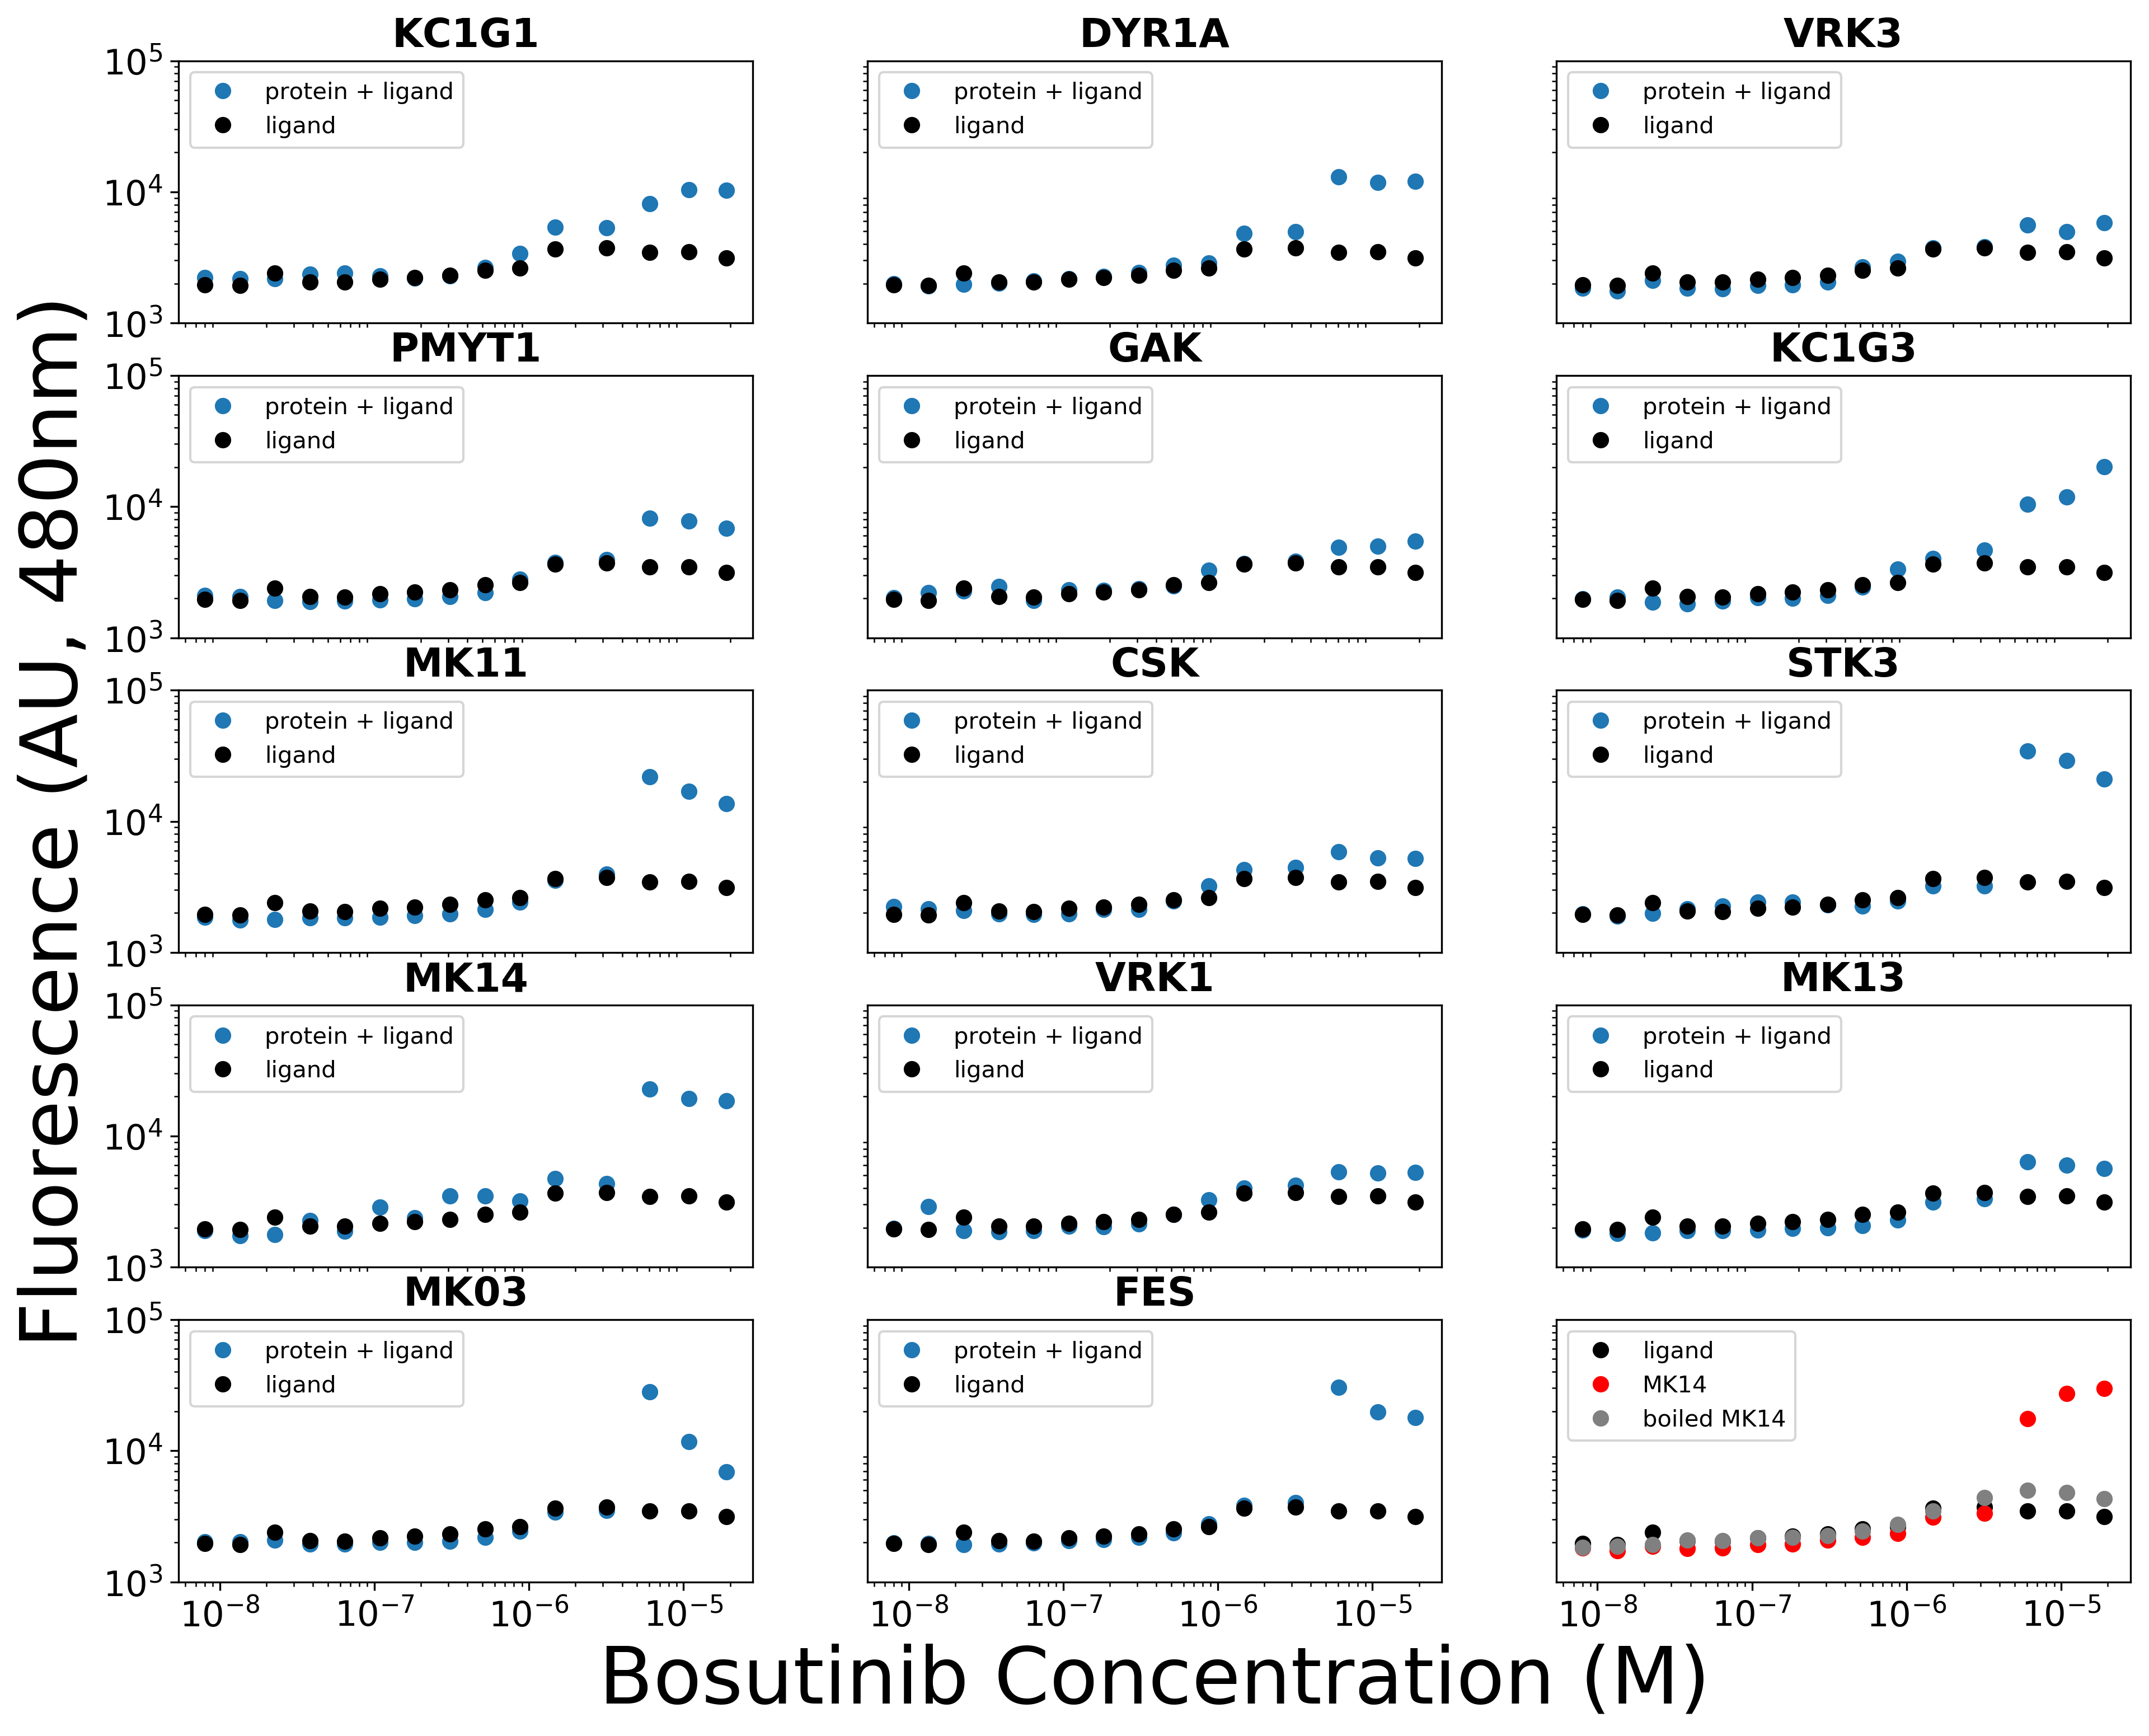

In [161]:
current_palette = sns.color_palette()

wavelength = '480'
fluorescence_color = current_palette[0]
deriv_color = current_palette[3]
lig_color = 'black'
ymax = data.max().max().max()

fig = plt.figure(figsize=(15,12), dpi=300)
for i,kinase in enumerate(list(kinase_pos.keys())):
    row = kinase_pos[kinase][0]
    column = kinase_pos[kinase][1]
    index = i + 1
    ax1 = fig.add_subplot(5,3,index)
    
    if i == 13: 
        plt.xlabel('Bosutinib Concentration (M)', fontsize=34)
    if i == 6: 
        plt.ylabel('Fluorescence (AU, 480nm)', fontsize=34)

    # Plot fluorescence
    plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=fluorescence_color, marker='.', linestyle='None', markersize=12)
    plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None', markersize=12)
    ax1.set_ylim(1000, 100000)
    #ax1.set_ylim(0, math.kymax)
    ax1.yaxis.set_tick_params(labelsize=15)
    ax1.xaxis.set_tick_params(labelsize=15)
    plt.legend(['protein + ligand', 'ligand'], loc=2)
    
    # Title subplot
    plt.title('%s' % kinase, fontsize=17, fontweight='bold')  
    
    if i < 12:
        ax1.xaxis.set_ticks([])
    if i not in [0, 3, 6, 9, 12]:
        ax1.yaxis.set_ticks([])
    
    

# Plot no detectable expression case
ax1 = fig.add_subplot(5,3,15)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, data[4,4,:,x_values.index(wavelength)], c=color[colorindex], color='red', marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, data[4,5,:,x_values.index(wavelength)], c=color[colorindex], color='grey', marker='.', linestyle='None', markersize=12)
ax1.set_ylim(1000, 100000)
ax1.yaxis.set_ticks([])
ax1.xaxis.set_tick_params(labelsize=15)
# Make sure something is plotted for the derivative
#y = y * 0
#ax1.plot(temps4, y, color=deriv_color, linestyle=':')
#ax1.xaxis.set_ticks([30, 40, 50, 60, 70, 80, 90])
#plt.title('No detectable kinase expression', fontsize=18, fontweight='bold')

plt.legend(['ligand', 'MK14', 'boiled MK14']);

# Save figure
#fig.tight_layout()
fig.savefig('bos_15panel_%s.pdf' % wavelength, dpi=300)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


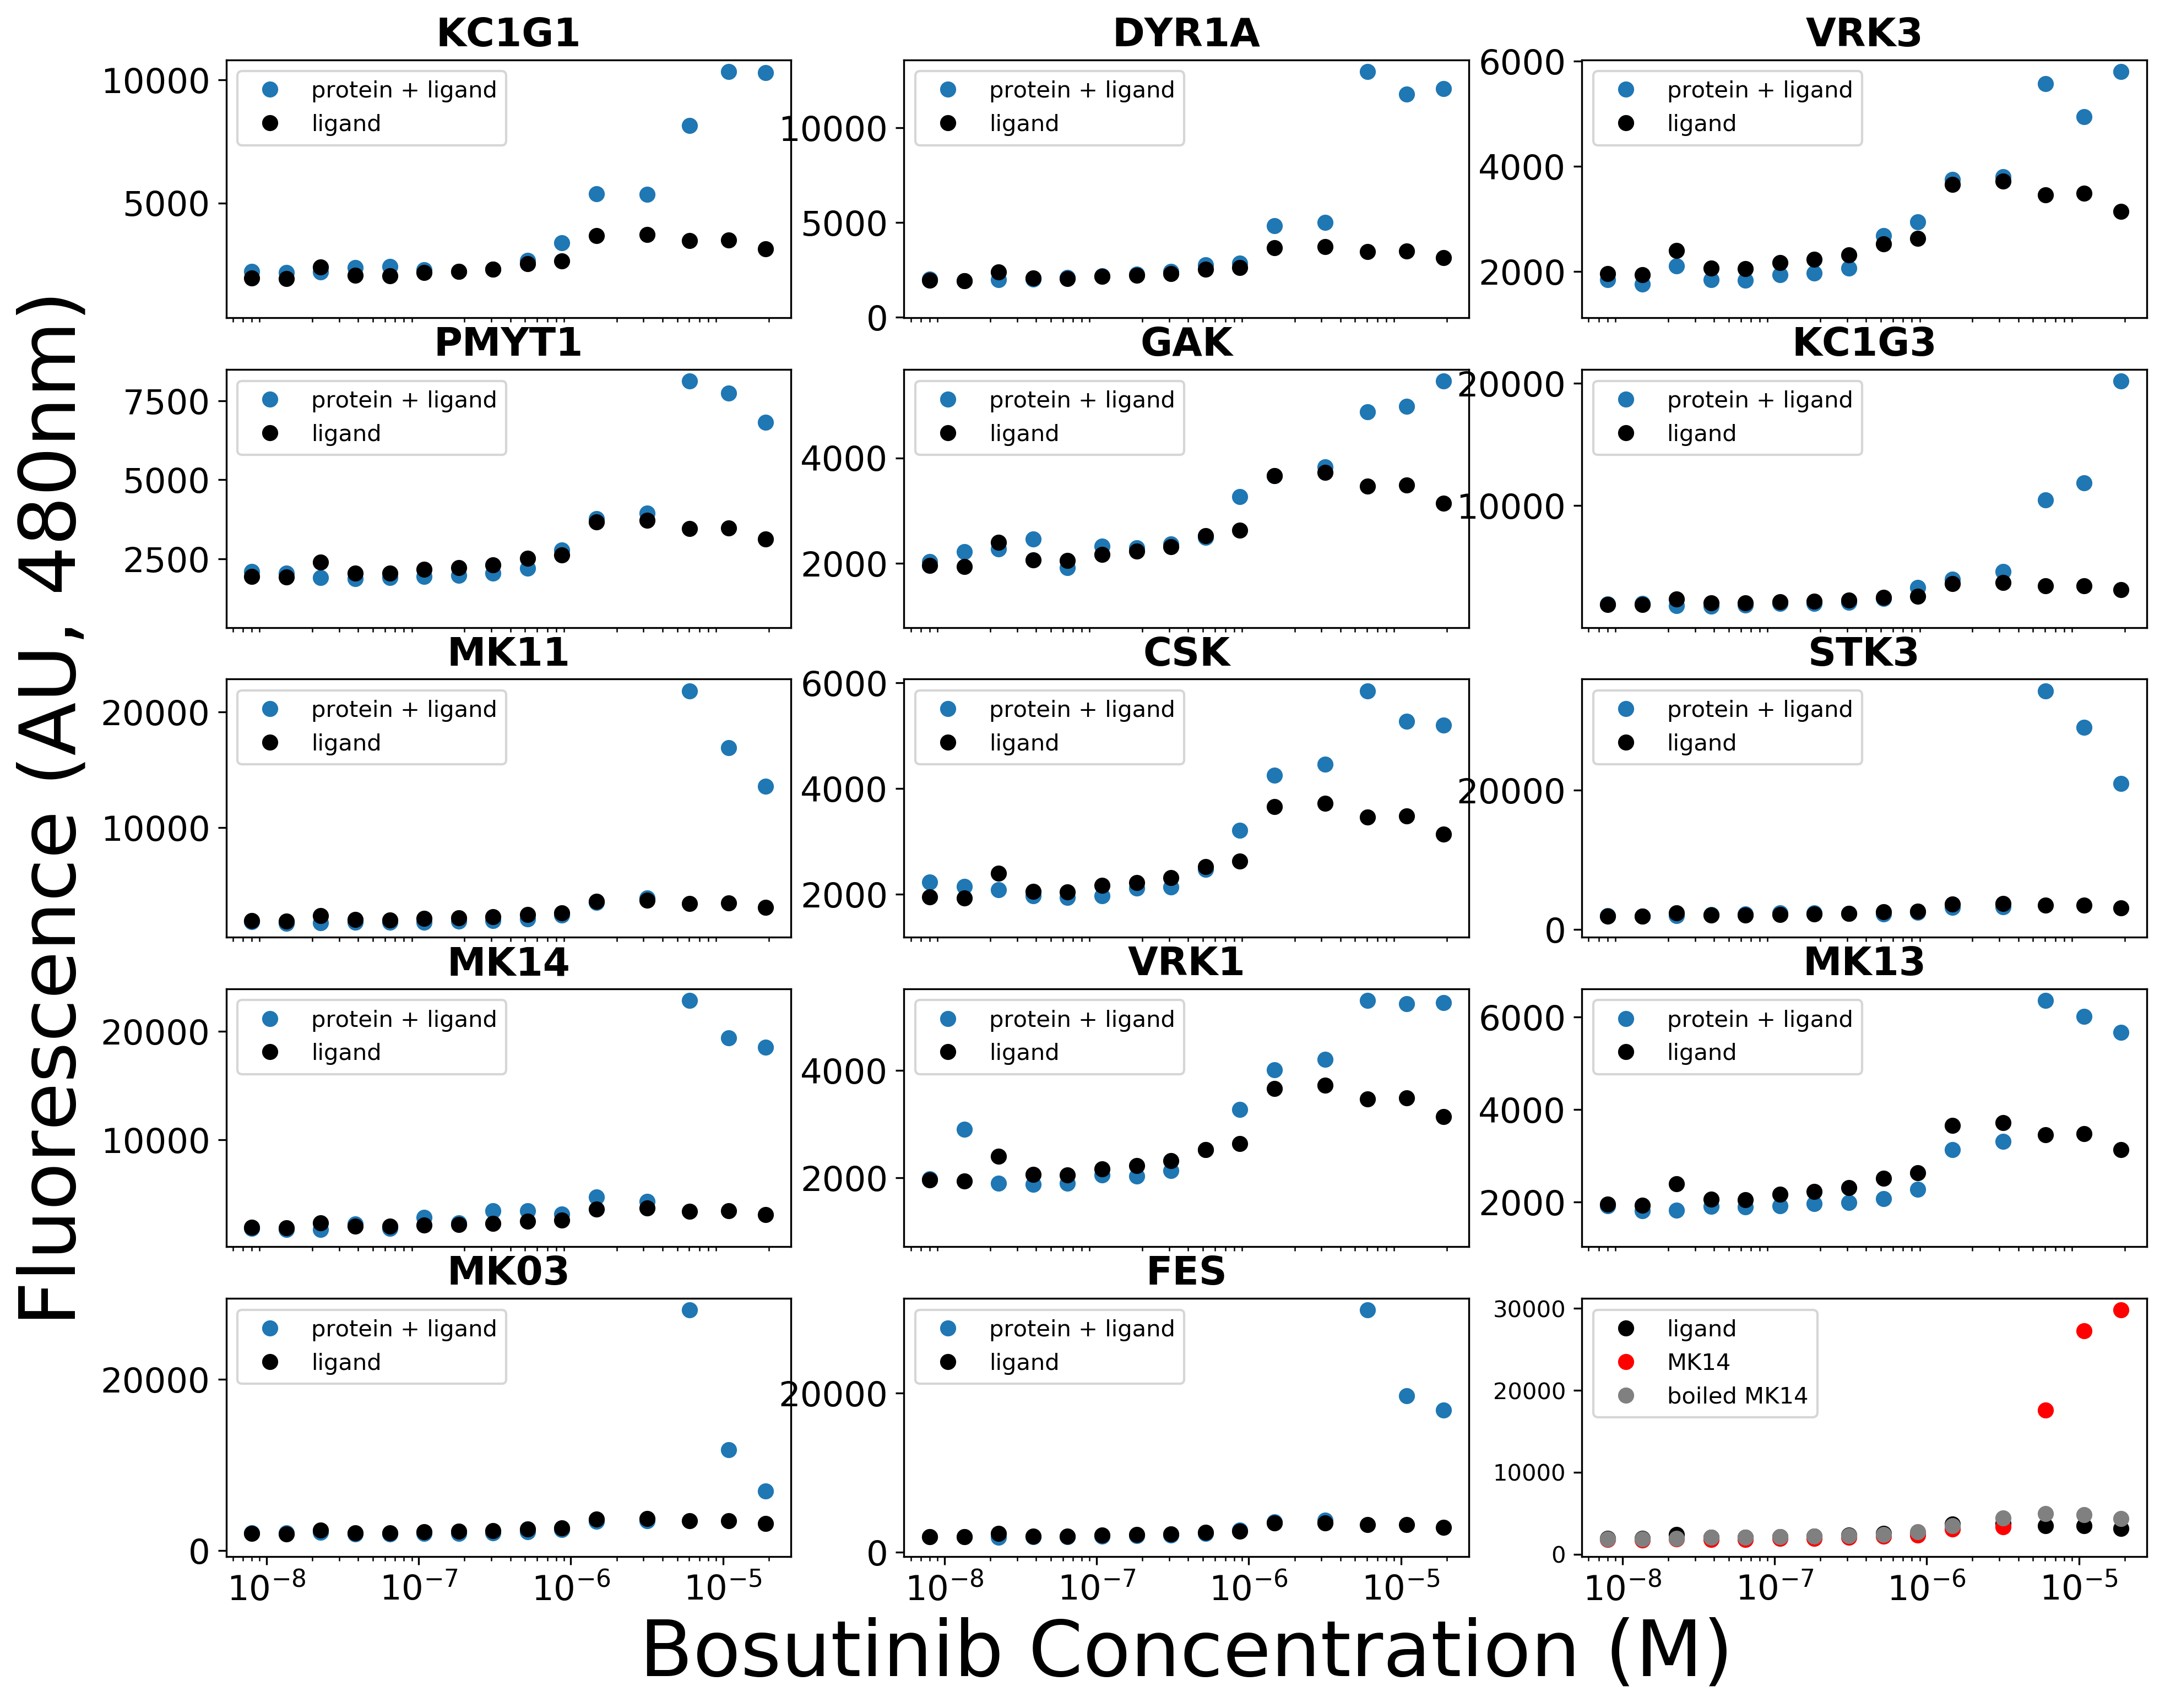

In [162]:
current_palette = sns.color_palette()

wavelength = '480'
fluorescence_color = current_palette[0]
deriv_color = current_palette[3]
lig_color = 'black'
ymax = data.max().max().max()

fig = plt.figure(figsize=(15,12), dpi=300)
for i,kinase in enumerate(list(kinase_pos.keys())):
    row = kinase_pos[kinase][0]
    column = kinase_pos[kinase][1]
    index = i + 1
    ax1 = fig.add_subplot(5,3,index)
    
    if i == 13: 
        plt.xlabel('Bosutinib Concentration (M)', fontsize=34)
    if i == 6: 
        plt.ylabel('Fluorescence (AU, 480nm)', fontsize=34)

    # Plot fluorescence
    plt.semilogx(concentrations, data[row,column,:,x_values.index(wavelength)], c=fluorescence_color, marker='.', linestyle='None', markersize=12)
    plt.semilogx(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None', markersize=12)
    #ax1.set_ylim(1000, 100000)
    #ax1.set_ylim(0, math.kymax)
    ax1.yaxis.set_tick_params(labelsize=15)
    ax1.xaxis.set_tick_params(labelsize=15)
    plt.legend(['protein + ligand', 'ligand'], loc=2)
    
    # Title subplot
    plt.title('%s' % kinase, fontsize=17, fontweight='bold')  
    
    if i < 12:
        ax1.xaxis.set_ticks([])
  #  if i not in [0, 3, 6, 9, 12]:
        #ax1.yaxis.set_ticks([])
    
    

# Plot no detectable expression case
ax1 = fig.add_subplot(5,3,15)
plt.semilogx(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, data[4,4,:,x_values.index(wavelength)], c=color[colorindex], color='red', marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, data[4,5,:,x_values.index(wavelength)], c=color[colorindex], color='grey', marker='.', linestyle='None', markersize=12)
#ax1.set_ylim(1000, 100000)
#ax1.yaxis.set_ticks([])
ax1.xaxis.set_tick_params(labelsize=15)
# Make sure something is plotted for the derivative
#y = y * 0
#ax1.plot(temps4, y, color=deriv_color, linestyle=':')
#ax1.xaxis.set_ticks([30, 40, 50, 60, 70, 80, 90])
#plt.title('No detectable kinase expression', fontsize=18, fontweight='bold')

plt.legend(['ligand', 'MK14', 'boiled MK14']);

# Save figure
#fig.tight_layout()
fig.savefig('bos_15panel_%s_logx.pdf' % wavelength, dpi=300)